LF power:     HRV_ULF   HRV_VLF   HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF   HRV_LFn  \
0  0.000034  0.000371  0.00023  0.000078  0.000005   2.93577  0.319711   

    HRV_HFn  HRV_LnHF  
0  0.108902  -9.45474  


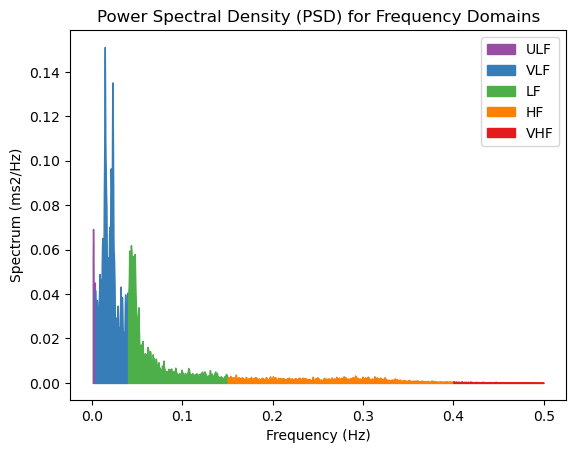

In [4]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("a02.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())

section=signal[:1000]
# Preprocess the ECG signal
cleaned_signal = nk.ecg_clean(section, sampling_rate=100)

# Detect R-peaks in the cleaned ECG signal using the `nk.ecg_findpeaks` function
rpeaks = nk.ecg_findpeaks(signal, sampling_rate=100)["ECG_R_Peaks"]
#print(rpeaks)
# Create a new figure and plot the ECG signal
#fig, ax = plt.subplots(figsize=(12,4))
#ax.plot(section)
# Add the R-peaks to the plot
#ax.scatter(rpeaks, section[rpeaks], color='red')

# Add axis labels and a title to the plot
#ax.set_xlabel('Sample')
#ax.set_ylabel('Amplitude')
#ax.set_title('ECG Signal with R-Peaks')
#plt.show()


hrv = nk.hrv_time(rpeaks, sampling_rate=100)
# Compute the low-frequency (LF) spectral power of the HRV signal
lf_power = nk.hrv_frequency(rpeaks, sampling_rate=100)


print("Power:", lf_power)


# Compute the PSD of the HRV signal
# Compute HRV indices using method="welch"
hrv_welch = nk.hrv_frequency(rpeaks, sampling_rate=100, show=True, psd_method="welch")

# Plot the PSD
#nk.zzz.plot_psd(psd)

In [56]:
import pandas as pd
import neurokit2 as nk

df = pd.read_csv("a01_interpolated.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())

# Preprocess the ECG signal
cleaned_signal = nk.ecg_clean(signal, sampling_rate=100)

# Interpolate the signal
interpolated_signal = nk.signal_interpolate(cleaned_signal)
# Detect R-peaks in the cleaned ECG signal
rpeaks = nk.ecg_findpeaks(cleaned_signal, sampling_rate=100)["ECG_R_Peaks"]
print(rpeaks)
# Compute the heart rate variability (HRV) time series
#hrv = nk.hrv_time(rpeaks, sampling_rate=100)

# Compute the low-frequency (LF) spectral power of the HRV signal
lf_power = nk.hrv_frequency(rpeaks, sampling_rate=100)


print("LF power:", lf_power)

[    114     198     281 ... 2956273 2956354 2956435]
LF power:     HRV_ULF   HRV_VLF   HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF   HRV_LFn  \
0  0.000061  0.000593  0.00062  0.000614  0.000097  1.009281  0.312343   

    HRV_HFn  HRV_LnHF  
0  0.309471 -7.395517  


In [ ]:

import astropy 
import future 
import nolds 
import numpy 
import scipy 
from hrvanalysis import plot_psd
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("a02.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())

section=signal[:1000]
# Preprocess the ECG signal
cleaned_signal = nk.ecg_clean(section, sampling_rate=100)

# Detect R-peaks in the cleaned ECG signal using the `nk.ecg_findpeaks` function
rpeaks = nk.ecg_findpeaks(signal, sampling_rate=100)["ECG_R_Peaks"]
# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = rpeaks

plot_psd(nn_intervals_list, method="welch")